In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_excel("/home/pavankumar/data_sci_dec/datasets/Participants_Data_Final/Data_Train.xlsx")
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [3]:
df.shape

(12690, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [5]:
df.isna().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

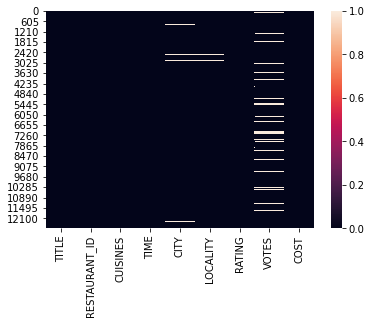

In [6]:
sns.heatmap(df.isna())

##### Heatmap shows that CITY, LOCALITY and VOTES having some null values

In [7]:

for i in df.select_dtypes('object').columns:
    print("Column name is ",i)
    print(df[i].value_counts(),'\n')
    print(f'\n Total Number of Categoricals in {i} ==> {len(df[i].value_counts())}\n')
    print("==============================")

Column name is  TITLE
QUICK BITES                 4218
CASUAL DINING               3652
None                        1003
CAFÉ                         607
DESSERT PARLOR               382
                            ... 
PUB,CAFÉ                       1
CAFÉ,LOUNGE                    1
BAKERY,FOOD COURT              1
SWEET SHOP,CONFECTIONERY       1
SWEET SHOP,BEVERAGE SHOP       1
Name: TITLE, Length: 113, dtype: int64 


 Total Number of Categoricals in TITLE ==> 113

Column name is  CUISINES
South Indian                                        532
North Indian                                        526
North Indian, Chinese                               501
Fast Food                                           286
Chinese                                             167
                                                   ... 
North Indian, Mughlai, BBQ                            1
North Indian, Chinese, Pizza, Sandwich, Desserts      1
North Indian, Gujarati, Italian, Parsi, Lebanese    

### Handeling Null values

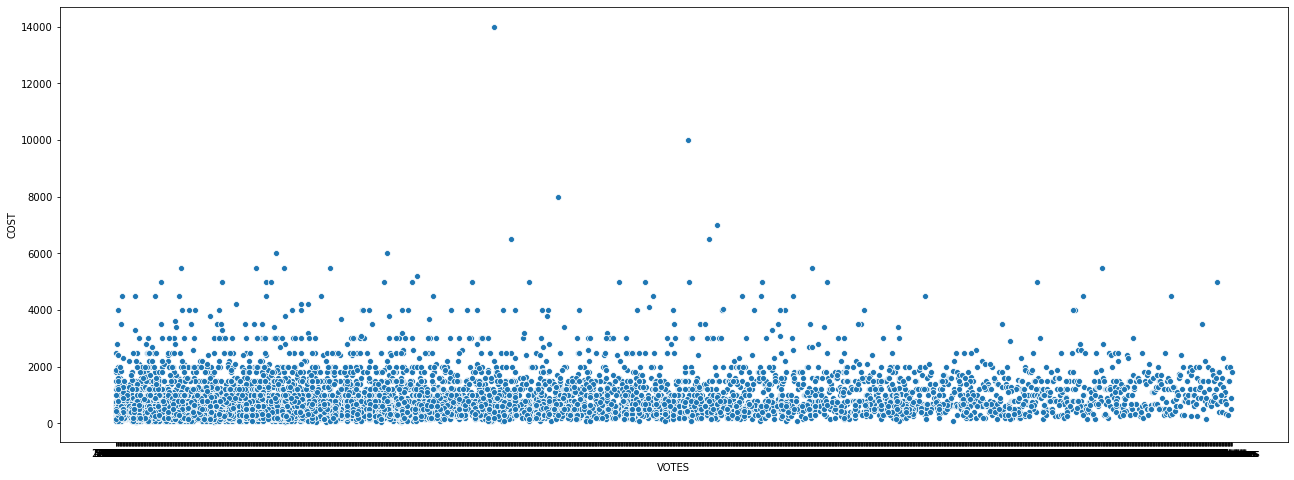

In [8]:
plt.figure(figsize=(22,8))
sns.scatterplot(x=df['VOTES'],y=df['COST'])

In [9]:
df['COST'].argmax()

1475

In [10]:
df.loc[1475,]

TITLE                          FINE DINING
RESTAURANT_ID                         4687
CUISINES         Continental, North Indian
TIME                  2pm – 11pm (Mon-Sun)
CITY                             Bangalore
LOCALITY                          Nagawara
RATING                                 3.9
VOTES                            126 votes
COST                                 14000
Name: 1475, dtype: object

In [11]:
(df['VOTES'].value_counts().values).max()

71

In [12]:
len(df[df['VOTES']=='126 votes'])

25

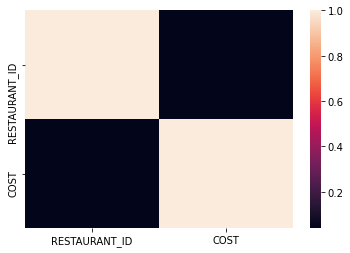

In [13]:
sns.heatmap(df.corr())

### Handeling RATING column

In [14]:
import string
for i,j in df['RATING'].value_counts().items():
    if i[0] in list(string.ascii_uppercase):
        print(i,j)
    if i[0] in list(string.ascii_lowercase):
        print(i)
    else:
        pass

NEW 707


In [15]:
import string
for i,j in df['RATING'].value_counts().items():
    if i[0].isnumeric():
        pass
    else:
        print(i)

NEW
-


In [16]:
len(df[df['RATING']=='-'])

495

In [17]:
len(df[df['RATING']=='NEW'])

707

In [18]:
495+707

1202

In [19]:
df['VOTES'].isnull().sum()

1204

In [20]:
df.shape

(12690, 9)

In [21]:
rating_df=df[(df['RATING'].isin(['NEW','-']))]

In [22]:
rating_df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
13,CASUAL DINING,4319,South Indian,11am – 11:30pm (Mon-Sun),Kochi,Edappally,-,NaN,400
62,QUICK BITES,7841,"North Indian, Beverages",11am – 11pm (Mon-Sun),Kochi,Kalamassery,NEW,NaN,200
69,None,11096,"Pizza, Fast Food",11am – 11pm (Mon-Sun),New Delhi,Kalkaji,NEW,NaN,200
85,QUICK BITES,12657,"North Indian, South Indian","Closed (Mon),7:30am – 10:30pm (Tue-Sun)",Bangalore,Vijay Nagar,-,NaN,300
111,CASUAL DINING,7095,"Gujarati, Rajasthani, North Indian","11:30am – 3:30pm, 7pm – 11pm (Mon-Sun)",Mumbai,Borivali West,NEW,NaN,800
...,...,...,...,...,...,...,...,...,...
12630,CASUAL DINING,9959,"Tex-Mex, Italian, Coffee",8am – 10:30pm (Mon-Sun),Gurgaon,Golf Course Road,NEW,NaN,1200
12641,CASUAL DINING,8312,Kerala,7:30am – 11:30pm (Mon-Sun),Kochi,Pallimukku,-,NaN,300
12646,QUICK BITES,6050,"Kerala, Chinese",11am – 11pm (Mon-Sun),Ernakulam,Market Road,-,NaN,300
12658,None,9384,"Kerala, South Indian",11am – 5pm (Mon-Sun),Kochi,Chittoor Road,NEW,NaN,400


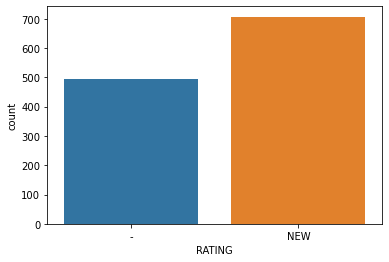

In [23]:
sns.countplot(rating_df['RATING'])

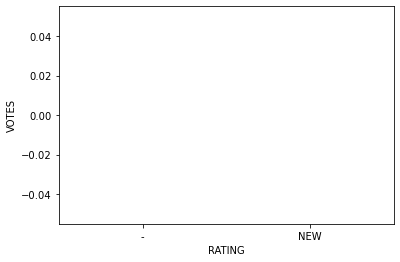

In [24]:
sns.barplot(x=rating_df['RATING'],y=rating_df['VOTES'])

In [25]:
rating_df['VOTES'].isnull().sum()

1202

In [26]:
df['VOTES'].isnull().sum() ## TWQ Rows having extra nulls because RATING havinh also have null

1204

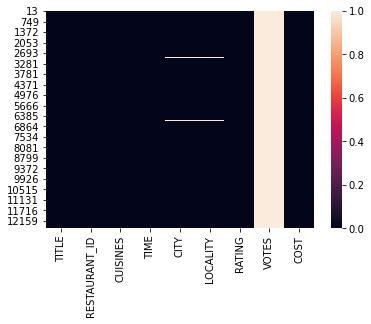

In [27]:
sns.heatmap(rating_df.isnull())

###### Observation : Where RATING is NEW or - VOTES having null

In [28]:
len(df[~df['RATING'].isin(['NEW','-'])]['RATING'])

11488

In [29]:
len(df[~df['RATING'].isin(['NEW','-'])]['RATING'].dropna(axis=0))

11486

In [30]:
df['RATING'].value_counts()

3.9    1238
3.8    1190
4.0    1099
3.7    1086
3.6     951
4.1     936
3.5     771
4.2     723
NEW     707
3.4     575
4.3     556
-       495
3.3     365
4.4     362
3.2     266
4.5     199
3.1     186
2.9     186
3.0     170
2.8     146
4.6     141
2.7      89
4.7      69
2.6      61
2.5      35
4.8      32
4.9      22
2.4      15
2.3      10
2.1       3
2.2       2
2.0       2
Name: RATING, dtype: int64

In [31]:
df[df['RATING']=='3.9']['VOTES']

8        101 votes
23       533 votes
47       985 votes
52       739 votes
59       196 votes
           ...    
12610    238 votes
12634    205 votes
12665     38 votes
12667    146 votes
12678     59 votes
Name: VOTES, Length: 1238, dtype: object

In [32]:
df[df['VOTES']=='985 votes']['TITLE'].value_counts()

CASUAL DINING,BAR    2
LOUNGE,BAR           1
Name: TITLE, dtype: int64

In [33]:
df[df['VOTES']=='985 votes']['RATING']

47       3.9
2711     4.3
10753    4.2
Name: RATING, dtype: object

In [34]:
df[df['RATING']=='-']["TITLE"].value_counts()

QUICK BITES                     190
CASUAL DINING                   154
BAKERY                           47
CAFÉ                             26
DESSERT PARLOR                   20
BEVERAGE SHOP                    14
None                             11
BAKERY,QUICK BITES                5
BEVERAGE SHOP,QUICK BITES         4
QUICK BITES,BAKERY                3
FOOD COURT                        2
DESSERT PARLOR,BEVERAGE SHOP      2
DESSERT PARLOR,QUICK BITES        2
QUICK BITES,DESSERT PARLOR        1
FOOD COURT,QUICK BITES            1
CAFÉ,DESSERT PARLOR               1
CAFÉ,FINE DINING                  1
DESSERT PARLOR,BAKERY             1
CAFÉ,BEVERAGE SHOP                1
SWEET SHOP,BAKERY                 1
FOOD TRUCK                        1
KIOSK                             1
BAKERY,CAFÉ                       1
BAR                               1
CASUAL DINING,CAFÉ                1
FINE DINING                       1
PAAN SHOP                         1
BEVERAGE SHOP,FOOD COURT    

In [35]:
df[df['RATING']=='-'][["TITLE",'VOTES']]

,TITLE,VOTES
13,CASUAL DINING,NaN
85,QUICK BITES,NaN
156,QUICK BITES,NaN
178,CASUAL DINING,NaN
235,QUICK BITES,NaN
...,...,...
12584,QUICK BITES,NaN
12585,CASUAL DINING,NaN
12591,BEVERAGE SHOP,NaN
12641,CASUAL DINING,NaN


In [36]:
df[df['RATING']=='NEW']["TITLE"].value_counts()

QUICK BITES                   345
None                          126
CASUAL DINING                  92
CAFÉ                           35
BEVERAGE SHOP                  21
DESSERT PARLOR                 21
CASUAL DINING,BAR              13
BAKERY                         11
BAR,CASUAL DINING               8
FOOD TRUCK                      3
BEVERAGE SHOP,QUICK BITES       3
BAR                             3
BAKERY,QUICK BITES              2
MICROBREWERY,CASUAL DINING      2
CAFÉ,BAKERY                     2
LOUNGE                          2
SWEET SHOP,QUICK BITES          2
CAFÉ,CASUAL DINING              1
CASUAL DINING,CLUB              1
QUICK BITES,DESSERT PARLOR      1
FOOD COURT                      1
DHABA                           1
SWEET SHOP                      1
DESSERT PARLOR,QUICK BITES      1
COCKTAIL BAR                    1
COCKTAIL BAR,CASUAL DINING      1
PUB,CASUAL DINING               1
CLUB                            1
CAFÉ,QUICK BITES                1
LOUNGE,BAR    

###### Replacing NEW to 1.0 Rating and - to 0.0 

In [37]:
df["RATING"].replace("NEW",'1.0',inplace=True)

In [38]:
df["RATING"].replace("-",'0.0',inplace=True)

In [39]:
df.dropna(subset=['RATING'],axis=0,inplace=True)

In [40]:
df['RATING']=df['RATING'].astype('float')

In [41]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              0
VOTES            1202
COST                0
dtype: int64

##### Handeling null values in VOTES

In [42]:
df['RATING'].dtype

dtype('float64')

In [43]:
df.loc[13,]

TITLE                       CASUAL DINING
RESTAURANT_ID                        4319
CUISINES                     South Indian
TIME             11am – 11:30pm (Mon-Sun)
CITY                                Kochi
LOCALITY                        Edappally
RATING                                  0
VOTES                                 NaN
COST                                  400
Name: 13, dtype: object

In [44]:
df.loc[62,]

TITLE                        QUICK BITES
RESTAURANT_ID                       7841
CUISINES         North Indian, Beverages
TIME               11am – 11pm (Mon-Sun)
CITY                               Kochi
LOCALITY                     Kalamassery
RATING                                 1
VOTES                                NaN
COST                                 200
Name: 62, dtype: object

In [45]:
df[df['RATING']==1]["TITLE"].value_counts().keys()

Index(['QUICK BITES', 'None', 'CASUAL DINING', 'CAFÉ', 'BEVERAGE SHOP',
       'DESSERT PARLOR', 'CASUAL DINING,BAR', 'BAKERY', 'BAR,CASUAL DINING',
       'FOOD TRUCK', 'BEVERAGE SHOP,QUICK BITES', 'BAR', 'BAKERY,QUICK BITES',
       'MICROBREWERY,CASUAL DINING', 'CAFÉ,BAKERY', 'LOUNGE',
       'SWEET SHOP,QUICK BITES', 'CAFÉ,CASUAL DINING', 'CASUAL DINING,CLUB',
       'QUICK BITES,DESSERT PARLOR', 'FOOD COURT', 'DHABA', 'SWEET SHOP',
       'DESSERT PARLOR,QUICK BITES', 'COCKTAIL BAR',
       'COCKTAIL BAR,CASUAL DINING', 'PUB,CASUAL DINING', 'CLUB',
       'CAFÉ,QUICK BITES', 'LOUNGE,BAR', 'MESS', 'CASUAL DINING,BAKERY',
       'DESSERT PARLOR,CAFÉ'],
      dtype='object')

In [46]:
df[df['RATING']==1.0]["TITLE"].value_counts()

QUICK BITES                   345
None                          126
CASUAL DINING                  92
CAFÉ                           35
BEVERAGE SHOP                  21
DESSERT PARLOR                 21
CASUAL DINING,BAR              13
BAKERY                         11
BAR,CASUAL DINING               8
FOOD TRUCK                      3
BEVERAGE SHOP,QUICK BITES       3
BAR                             3
BAKERY,QUICK BITES              2
MICROBREWERY,CASUAL DINING      2
CAFÉ,BAKERY                     2
LOUNGE                          2
SWEET SHOP,QUICK BITES          2
CAFÉ,CASUAL DINING              1
CASUAL DINING,CLUB              1
QUICK BITES,DESSERT PARLOR      1
FOOD COURT                      1
DHABA                           1
SWEET SHOP                      1
DESSERT PARLOR,QUICK BITES      1
COCKTAIL BAR                    1
COCKTAIL BAR,CASUAL DINING      1
PUB,CASUAL DINING               1
CLUB                            1
CAFÉ,QUICK BITES                1
LOUNGE,BAR    

In [47]:
df[(df['TITLE']=='CAFÉ,FINE DINING')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
8847,"CAFÉ,FINE DINING",8855,Cafe,24 Hours (Mon-Sun),Kochi International Airport VIP Road,Courtyard by Marriott,0.0,NaN,1500


In [48]:
impute_vote1={}
for i in df[df['RATING']==1.0]["TITLE"].value_counts().keys():    
    print('Column name is',i,'and',df[(df['TITLE']==i)]['VOTES'].mode()[0])
    print('====================================')
    impute_vote1[i]=df[(df['TITLE']==i)]['VOTES'].mode()[0]

Column name is QUICK BITES and 44 votes
Column name is None and 15 votes
Column name is CASUAL DINING and 39 votes
Column name is CAFÉ and 58 votes
Column name is BEVERAGE SHOP and 46 votes
Column name is DESSERT PARLOR and 10 votes
Column name is CASUAL DINING,BAR and 109 votes
Column name is BAKERY and 128 votes
Column name is BAR,CASUAL DINING and 1153 votes
Column name is FOOD TRUCK and 211 votes
Column name is BEVERAGE SHOP,QUICK BITES and 14 votes
Column name is BAR and 46 votes
Column name is BAKERY,QUICK BITES and 117 votes
Column name is MICROBREWERY,CASUAL DINING and 636 votes
Column name is CAFÉ,BAKERY and 100 votes
Column name is LOUNGE and 388 votes
Column name is SWEET SHOP,QUICK BITES and 73 votes
Column name is CAFÉ,CASUAL DINING and 1002 votes
Column name is CASUAL DINING,CLUB and 209 votes
Column name is QUICK BITES,DESSERT PARLOR and 10 votes
Column name is FOOD COURT and 48 votes
Column name is DHABA and 169 votes
Column name is SWEET SHOP and 106 votes
Column name 

In [49]:
df[df['RATING']==0.0]["TITLE"].value_counts()

QUICK BITES                     190
CASUAL DINING                   154
BAKERY                           47
CAFÉ                             26
DESSERT PARLOR                   20
BEVERAGE SHOP                    14
None                             11
BAKERY,QUICK BITES                5
BEVERAGE SHOP,QUICK BITES         4
QUICK BITES,BAKERY                3
FOOD COURT                        2
DESSERT PARLOR,BEVERAGE SHOP      2
DESSERT PARLOR,QUICK BITES        2
QUICK BITES,DESSERT PARLOR        1
FOOD COURT,QUICK BITES            1
CAFÉ,DESSERT PARLOR               1
CAFÉ,FINE DINING                  1
DESSERT PARLOR,BAKERY             1
CAFÉ,BEVERAGE SHOP                1
SWEET SHOP,BAKERY                 1
FOOD TRUCK                        1
KIOSK                             1
BAKERY,CAFÉ                       1
BAR                               1
CASUAL DINING,CAFÉ                1
FINE DINING                       1
PAAN SHOP                         1
BEVERAGE SHOP,FOOD COURT    

In [50]:
df[(df['RATING']==1.0) & (df['TITLE']=='QUICK BITES')].isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY               0
LOCALITY           0
RATING             0
VOTES            345
COST               0
dtype: int64

In [51]:
df['TITLE'].value_counts()

QUICK BITES                 4218
CASUAL DINING               3652
None                        1003
CAFÉ                         606
DESSERT PARLOR               382
                            ... 
PUB,CAFÉ                       1
CAFÉ,LOUNGE                    1
BAKERY,FOOD COURT              1
SWEET SHOP,CONFECTIONERY       1
SWEET SHOP,BEVERAGE SHOP       1
Name: TITLE, Length: 113, dtype: int64

In [52]:
impute_vote0={}
for i in df[df['RATING']==0.0]["TITLE"].value_counts().keys():    
    if df[(df['TITLE']==i)]['VOTES'].mode().empty==False:
        print('Column name is',i,'and',df[(df['TITLE']==i)]['VOTES'].mode()[0])
        print('====================================')
        impute_vote0[i]=df[(df['TITLE']==i)]['VOTES'].mode()[0]

Column name is QUICK BITES and 44 votes
Column name is CASUAL DINING and 39 votes
Column name is BAKERY and 128 votes
Column name is CAFÉ and 58 votes
Column name is DESSERT PARLOR and 10 votes
Column name is BEVERAGE SHOP and 46 votes
Column name is None and 15 votes
Column name is BAKERY,QUICK BITES and 117 votes
Column name is BEVERAGE SHOP,QUICK BITES and 14 votes
Column name is QUICK BITES,BAKERY and 68 votes
Column name is FOOD COURT and 48 votes
Column name is DESSERT PARLOR,BEVERAGE SHOP and 228 votes
Column name is DESSERT PARLOR,QUICK BITES and 11 votes
Column name is QUICK BITES,DESSERT PARLOR and 10 votes
Column name is FOOD COURT,QUICK BITES and 137 votes
Column name is CAFÉ,DESSERT PARLOR and 40 votes
Column name is DESSERT PARLOR,BAKERY and 187 votes
Column name is CAFÉ,BEVERAGE SHOP and 157 votes
Column name is SWEET SHOP,BAKERY and 184 votes
Column name is FOOD TRUCK and 211 votes
Column name is KIOSK and 20 votes
Column name is BAKERY,CAFÉ and 118 votes
Column name is

In [53]:
if df[(df['TITLE']=='CAFÉ,FINE DINING')]['VOTES'].mode().empty==True:
    print('Empty')

Empty


In [54]:
df.iloc[8,:]

TITLE                           QUICK BITES
RESTAURANT_ID                          7062
CUISINES         South Indian, North Indian
TIME                7am – 10:30pm (Mon-Sun)
CITY                              Bangalore
LOCALITY                  Bannerghatta Road
RATING                                  3.9
VOTES                             101 votes
COST                                    300
Name: 8, dtype: object

In [55]:
df.loc[df['VOTES'].isnull(),['VOTES']].replace(np.nan,"asssd")

,VOTES
13,asssd
62,asssd
69,asssd
85,asssd
111,asssd
...,...
12630,asssd
12641,asssd
12646,asssd
12658,asssd


In [56]:
lis=[62]
df['VOTES'][lis].replace(np.nan,"asssd")

62    asssd
Name: VOTES, dtype: object

In [57]:
for i in df.index:
    if (df["TITLE"][i] in impute_vote1.keys()) and (pd.isnull(df['VOTES'][i])) and (df['RATING'][i]==1.0):
        if df[(df['TITLE']==df["TITLE"][i])]['VOTES'].mode().empty==False:
            df['VOTES'][i]=impute_vote1[df["TITLE"][i]]    
    if (df["TITLE"][i] in impute_vote0.keys()) and (pd.isnull(df['VOTES'][i])) and (df['RATING'][i]==0.0):
        if df[(df['TITLE']==df["TITLE"][i])]['VOTES'].mode().empty==False:
            df['VOTES'][i]=impute_vote0[df["TITLE"][i]]

In [58]:
df[(df['TITLE']=='QUICK BITES') & df['RATING']==0 ]['VOTES'].mode()

0    39 votes
dtype: object

In [59]:
df[(df['TITLE']=='QUICK BITES') & (df['RATING']==1)]['VOTES'].isnull().sum()

0

In [60]:
len(df[(df['TITLE']=='QUICK BITES') & (df['RATING']==1.0)]['VOTES'])

345

In [61]:
df[(df['TITLE']=='QUICK BITES') & (df['RATING']==0.0)]['VOTES']

85       44 votes
156      44 votes
235      44 votes
392      44 votes
452      44 votes
           ...   
12320    44 votes
12395    44 votes
12551    44 votes
12584    44 votes
12646    44 votes
Name: VOTES, Length: 190, dtype: object

In [62]:
df[(df['TITLE']=='QUICK BITES') & (df['RATING']==1.0)]['VOTES']

62       44 votes
117      44 votes
120      44 votes
165      44 votes
194      44 votes
           ...   
12390    44 votes
12407    44 votes
12471    44 votes
12565    44 votes
12602    44 votes
Name: VOTES, Length: 345, dtype: object

In [63]:
df.iloc[62,:]

TITLE                        QUICK BITES
RESTAURANT_ID                       7841
CUISINES         North Indian, Beverages
TIME               11am – 11pm (Mon-Sun)
CITY                               Kochi
LOCALITY                     Kalamassery
RATING                                 1
VOTES                           44 votes
COST                                 200
Name: 62, dtype: object

In [64]:
df.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY             112
LOCALITY          98
RATING             0
VOTES              2
COST               0
dtype: int64

In [65]:
df.loc[df['VOTES'].isnull(),['TITLE','VOTES']]

,TITLE,VOTES
253,"BEVERAGE SHOP,FOOD COURT",NaN
8847,"CAFÉ,FINE DINING",NaN


In [66]:
df[df['TITLE']=='CAFÉ,FINE DINING']

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
8847,"CAFÉ,FINE DINING",8855,Cafe,24 Hours (Mon-Sun),Kochi International Airport VIP Road,Courtyard by Marriott,0.0,NaN,1500


In [67]:
df[df['TITLE']=='BEVERAGE SHOP,FOOD COURT']

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
253,"BEVERAGE SHOP,FOOD COURT",6840,Juices,11am – 10pm (Mon-Sun),Kochi,Edappally,0.0,NaN,150


In [68]:
df[df['TITLE']=='BEVERAGE SHOP']

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
34,BEVERAGE SHOP,1494,"Beverages, Coffee, Tea",6am – 11pm (Mon-Sun),Chennai,Besant Nagar,2.7,132 votes,500
78,BEVERAGE SHOP,7739,Beverages,10am – 11pm (Mon-Sun),Bangalore,Kengeri,3.9,8 votes,150
101,BEVERAGE SHOP,13927,"Juices, Fast Food, Sandwich, Beverages","10am – 10pm (Mon),9:30am – 10pm (Tue),9:30am –...",Chennai,Poonamalle,3.4,19 votes,250
130,BEVERAGE SHOP,4940,"Beverages, Desserts, Ice Cream",11am – 1:30am (Mon-Sun),Andheri West,Shastri Nagar - Lokhandwala,4.2,317 votes,200
176,BEVERAGE SHOP,2680,Juices,9:30am – 10:30pm (Mon-Sun),Bangalore,Jayanagar,4.1,88 votes,100
...,...,...,...,...,...,...,...,...,...
12226,BEVERAGE SHOP,7747,"Beverages, Juices",12noon – 12midnight (Mon-Sun),Hyderabad,Tolichowki,3.8,45 votes,150
12239,BEVERAGE SHOP,11915,"Beverages, Fast Food",11am – 11pm (Mon-Sun),New Delhi,Yusuf Sarai,4.0,67 votes,300
12307,BEVERAGE SHOP,3479,Beverages,10am – 12midnight (Mon-Sun),Hyderabad,Banjara Hills,3.6,139 votes,250
12421,BEVERAGE SHOP,2677,"Juices, Beverages",9am – 10pm (Mon-Sun),Chennai,Velachery,4.0,70 votes,200


In [69]:
df[df['TITLE']=='FOOD COURT']

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
133,FOOD COURT,5171,Desserts,11am – 11pm (Mon-Sun),Hyderabad,Hitech City,3.8,52 votes,180
222,FOOD COURT,12024,"Hyderabadi, Biryani","7am – 3am (Mon-Fri),12noon – 3am (Sat-Sun)",Hyderabad,Madhapur,3.5,103 votes,300
470,FOOD COURT,15108,"Tibetan, Momos",11am – 11pm (Mon-Sun),Bangalore,Whitefield,3.6,67 votes,400
1037,FOOD COURT,10040,South Indian,10am – 10pm (Mon-Sun),Chennai,Vadapalani,3.4,47 votes,500
1309,FOOD COURT,724,North Indian,11am – 11pm (Mon-Sun),Dwarka,Sector 12,3.5,119 votes,400
...,...,...,...,...,...,...,...,...,...
11642,FOOD COURT,6305,"Continental, Fast Food",8am – 11pm (Mon-Sun),Bangalore,Whitefield,3.9,85 votes,500
12052,FOOD COURT,3962,North Indian,11am – 11pm (Mon-Sun),Hyderabad,3rd Floor Sujana Mall Kukatpally,3.8,31 votes,1000
12129,FOOD COURT,13667,Chinese,11am – 11:55pm (Mon-Sun),Secunderabad,Uppal,3.0,86 votes,400
12194,FOOD COURT,11400,Street Food,"12:5pm – 11:56pm (Mon),12:5pm – 11:55pm...",Secunderabad,Uppal,2.9,221 votes,200


In [70]:
df1=df.copy()

In [71]:
df1.dropna(subset=['VOTES'],axis=0,inplace=True)

In [72]:
df1.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY             112
LOCALITY          98
RATING             0
VOTES              0
COST               0
dtype: int64

In [73]:
for i in range(len(df1['VOTES'])) :
    try:
       df1['VOTES'][i] = int(df1['VOTES'][i].split(" ")[0].strip())
    except :
       pass 

In [74]:
# for i in df1.index:
#     df1['VOTES']=df1['VOTES'][i].split(' ')[0]
# df1['VOTES']=df1['VOTES'].astype('int')

In [75]:
df1[df1['TITLE']=='FINE DINING']['VOTES'].mean()

548.1233766233767

In [76]:
df1[df1['TITLE']=='CAFE']

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST


In [77]:
df1

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [78]:
df1[df1['TITLE']=='BEVERAGE SHOP']['VOTES'].mean()

121.30128205128206

In [79]:
df1[df1['TITLE']=='FOOD COURT']['VOTES'].mean()

119.21794871794872

In [80]:
(121+119)/2

120.0

In [81]:
df1[df1['TITLE']=='FINE DINING']['VOTES'].mean()

548.1233766233767

In [82]:
df[df['TITLE']=='BEVERAGE SHOP,FOOD COURT']['VOTES']='120 votes'

In [83]:
df[df['TITLE']=='CAFÉ,FINE DINING']['VOTES']='548 votes'

In [84]:
df.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY             112
LOCALITY          98
RATING             0
VOTES              2
COST               0
dtype: int64

In [85]:
# df.dropna(subset=['VOTES'],axis=0,inplace=True)

In [86]:
df[df['TITLE']=='BEVERAGE SHOP,FOOD COURT']['VOTES']

253    NaN
Name: VOTES, dtype: object

In [87]:
df[df['TITLE']=='CAFÉ,FINE DINING']['VOTES']

8847    NaN
Name: VOTES, dtype: object

In [88]:
df["VOTES"][8847]='548 votes'
df["VOTES"][253]='120 votes'

In [89]:
df.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY             112
LOCALITY          98
RATING             0
VOTES              0
COST               0
dtype: int64

In [90]:
for i in range(len(df['VOTES'])) :
    try:
       df['VOTES'][i] = int(df['VOTES'][i].split(" ")[0].strip())
    except :
       pass 

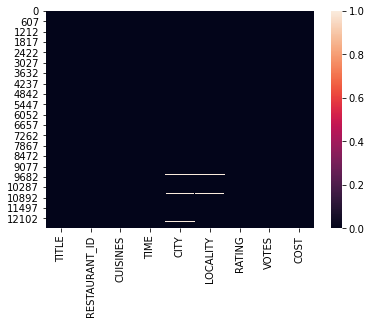

In [91]:
sns.heatmap(df.isnull())

In [92]:
df.loc[df['CITY'].isnull(),:]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
129,None,9101,"North Indian, South Indian, Chinese, Continental","12noon – 3pm, 7pm – 2am (Mon-Sun)",NaN,NaN,3.6,728,500
246,QUICK BITES,14502,Biryani,12noon – 11pm (Mon-Sun),NaN,Palarivattom Kochi,3.4,82,300
411,None,6313,"North Indian, Chinese, Pizza, Burger, Fast Food",7pm – 4am (Mon-Sun),NaN,NaN,4.0,29,600
466,None,1133,North Indian,4pm – 9pm (Mon-Sun),NaN,NaN,4.2,55,200
481,None,4788,Street Food,"11am – 11pm (Mon),9:30am – 12midnight (Tue-Sun)",NaN,NaN,3.7,616,250
...,...,...,...,...,...,...,...,...,...
12280,None,3446,"North Indian, Chinese",5pm – 5am (Mon-Sun),NaN,NaN,3.7,281,500
12314,CASUAL DINING,11724,"North Indian, Bengali","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",NaN,Opposite to corporation bank and LIC office ba...,4.3,775,650
12447,QUICK BITES,7314,"North Indian, Chinese, Mughlai, Seafood",12:30pm – 12midnight (Mon-Sun),NaN,Hyderabad,3.1,44,350
12567,None,15532,"Biryani, Chinese, Fast Food, North Indian","11am – 1am (Mon, Sun), 11am – 12:15AM (Tue-Sat)",NaN,NaN,3.7,656,300


In [93]:
df.loc[df['LOCALITY'].isnull(),:]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
129,None,9101,"North Indian, South Indian, Chinese, Continental","12noon – 3pm, 7pm – 2am (Mon-Sun)",NaN,NaN,3.6,728,500
411,None,6313,"North Indian, Chinese, Pizza, Burger, Fast Food",7pm – 4am (Mon-Sun),NaN,NaN,4.0,29,600
466,None,1133,North Indian,4pm – 9pm (Mon-Sun),NaN,NaN,4.2,55,200
481,None,4788,Street Food,"11am – 11pm (Mon),9:30am – 12midnight (Tue-Sun)",NaN,NaN,3.7,616,250
534,None,3233,"Healthy Food, Salad, Juices",11am – 10pm (Mon-Sun),NaN,NaN,3.6,30,600
...,...,...,...,...,...,...,...,...,...
12181,None,3861,Asian,"11am – 11pm (Mon, Tue, Thu, Sun), 11am – 3pm...",Kadubesanahalli Bangalore,NaN,1.0,15,300
12268,None,2177,Desserts,10am – 10pm (Mon-Sun),NaN,NaN,1.0,15,200
12280,None,3446,"North Indian, Chinese",5pm – 5am (Mon-Sun),NaN,NaN,3.7,281,500
12567,None,15532,"Biryani, Chinese, Fast Food, North Indian","11am – 1am (Mon, Sun), 11am – 12:15AM (Tue-Sat)",NaN,NaN,3.7,656,300


In [94]:
(112+98)*100/12590

1.6679904686258935

In [95]:
df.replace(np.nan,'None',inplace=True)

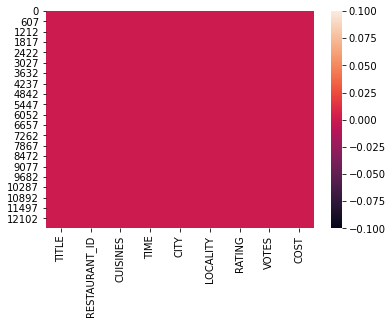

In [96]:
sns.heatmap(df.isnull())

### Handeling TIME column

In [97]:
import re

In [98]:
lis=[]
for i in df.index:
    time=df['TIME'][i]
    a = re.findall("\(.*\)", time)
    if a:
        lis.append(a[0])
# print(lis)
x=pd.Series(lis)
x=pd.DataFrame(x)
x
# x[0].value_counts()

,0
0,(Mon-Sun)
1,(Mon-Sun)
2,(Mon-Sun)
3,(Mon-Sun)
4,(Mon-Sun)
...,...
12415,"(Mon, Tue, Wed, Thu, Sun)"
12416,(Mon-Fri)
12417,(Mon-Sun)
12418,(Mon-Sun)


In [99]:
s="11am – 4pm, 7:30pm – 11:30pm (Mon-Sun) anything"
x = re.findall("\(.*\)", s)
x

['(Mon-Sun)']

In [100]:

txt = "The rain in Spain"
x = re.findall("^The.*Spain$", txt)
x

['The rain in Spain']

In [101]:
df['TIME']

0                  11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)
1                                    6pm – 11pm (Mon-Sun)
2                     11am – 3:30pm, 7pm – 11pm (Mon-Sun)
3                                 11:30am – 1am (Mon-Sun)
4                                    11am – 1am (Mon-Sun)
                               ...                       
12685    12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...
12686     12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...
12687                          12noon – 12:30AM (Mon-Sun)
12688                             6am – 10:45pm (Mon-Sun)
12689                            12:30pm – 11pm (Mon-Sun)
Name: TIME, Length: 12688, dtype: object

In [102]:
cuisines = list(df['CUISINES'])

maxim = 1
for i in cuisines :
    if len(i.split(',')) > maxim:
         maxim = len(i.split(','))
         
print("\n\nMaximum cuisines in a Cell : ", maxim)    

all_cuisines = []

for i in cuisines :
    if len(i.split(',')) == 1:
        #print(i.split(',')[0])
         all_cuisines.append(i.split(',')[0].strip().upper())
    else :
        for it in range(len(i.split(','))):
#             print(i.split(',')[it])
            all_cuisines.append(i.split(',')[it].strip().upper())

print("\n\nNumber of Unique Cuisines : ", len(pd.Series(all_cuisines).unique()))
print("\n\nUnique Cuisines:\n", pd.Series(all_cuisines).unique())

all_cuisines = list(pd.Series(all_cuisines).unique())



Maximum cuisines in a Cell :  8


Number of Unique Cuisines :  125


Unique Cuisines:
 ['MALWANI' 'GOAN' 'NORTH INDIAN' 'ASIAN' 'MODERN INDIAN' 'JAPANESE'
 'CHINESE' 'BIRYANI' 'HYDERABADI' 'TIBETAN' 'DESSERTS' 'SEAFOOD' 'CAFE'
 'PIZZA' 'BURGER' 'BAR FOOD' 'SOUTH INDIAN' 'FAST FOOD' 'BEVERAGES'
 'ARABIAN' 'MUGHLAI' 'MAHARASHTRIAN' 'PARSI' 'THAI' 'BAKERY' 'MOMOS'
 'CONTINENTAL' 'EUROPEAN' 'ROLLS' 'ANDHRA' 'ITALIAN' 'BBQ' 'FINGER FOOD'
 'TEA' 'AMERICAN' 'HEALTHY FOOD' 'COFFEE' 'INDONESIAN' 'KOREAN' 'NEPALESE'
 'ICE CREAM' 'MEXICAN' 'KERALA' 'INDIAN' 'MITHAI' 'STREET FOOD'
 'MALAYSIAN' 'VIETNAMESE' 'IRANIAN' 'KEBAB' 'JUICES' 'SANDWICH'
 'MEDITERRANEAN' 'SALAD' 'GUJARATI' 'RAJASTHANI' 'TEX-MEX' 'ROAST CHICKEN'
 'BURMESE' 'CHETTINAD' 'NORTH EASTERN' 'LEBANESE' 'COFFEE AND TEA' 'GRILL'
 '' 'BIHARI' 'BENGALI' 'LUCKNOWI' 'AWADHI' 'STEAK' 'FRENCH' 'PORTUGUESE'
 'WRAPS' 'SRI LANKAN' 'ORIYA' 'ETHIOPIAN' 'KONKAN' 'SUSHI' 'SPANISH'
 'RUSSIAN' 'MANGALOREAN' 'TURKISH' 'BUBBLE TEA' 'AFGHAN' 'NAGA'
 '

In [103]:
df[['CUISINES','TITLE']]

,CUISINES,TITLE
0,"Malwani, Goan, North Indian",CASUAL DINING
1,"Asian, Modern Indian, Japanese","CASUAL DINING,BAR"
2,"North Indian, Chinese, Biryani, Hyderabadi",CASUAL DINING
3,"Tibetan, Chinese",QUICK BITES
4,Desserts,DESSERT PARLOR
...,...,...
12685,"North Indian, Burger, Kebab",QUICK BITES
12686,"Goan, Continental","CASUAL DINING,BAR"
12687,"Finger Food, Continental, Asian, Chinese",LOUNGE
12688,"North Indian, South Indian, Chinese, Street Food",CASUAL DINING


In [104]:
maxim = 1
for i in df['TITLE'] :
    if len(i.split(',')) > maxim:
         maxim = len(i.split(','))
print("\n\nMaximum Title in a Cell : ", maxim)  



Maximum Title in a Cell :  2


In [105]:
maxim = 1
for i in df['LOCALITY'] :
    if len(i.split(',')) > maxim:
         maxim = len(i.split(','))
print("\n\nMaximum Title in a Cell : ", maxim)  



Maximum Title in a Cell :  1


In [106]:
maxim = 1
for i in df['CITY'] :
    if len(i.split(',')) > maxim:
         maxim = len(i.split(','))
print("\n\nMaximum Title in a Cell : ", maxim)  



Maximum Title in a Cell :  1


In [107]:
maxim = 1
for i in df['CUISINES'] :
    if len(i.split(',')) > maxim:
         maxim = len(i.split(','))
print("\n\nMaximum cuisines in a Cell : ", maxim)  



Maximum cuisines in a Cell :  8


In [108]:
Ti1=[]
Ti2=[]
for i in df['TITLE'] :
    Ti1.append(i.split(',')[0])
    try:
        Ti2.append(i.split(',')[1])
    except:
        Ti2.append('NONE')

In [109]:
new_df={}

In [110]:
new_df['Title1']=Ti1

In [111]:
new_df['Title2']=Ti2

In [112]:
pd.DataFrame(new_df)

,Title1,Title2
0,CASUAL DINING,NONE
1,CASUAL DINING,BAR
2,CASUAL DINING,NONE
3,QUICK BITES,NONE
4,DESSERT PARLOR,NONE
...,...,...
12683,QUICK BITES,NONE
12684,CASUAL DINING,BAR
12685,LOUNGE,NONE
12686,CASUAL DINING,NONE


In [113]:
cu1=[]
cu2=[]
cu3=[]
cu4=[]
cu5=[]
cu6=[]
cu7=[]
cu8=[]
for i in df['CUISINES'] :
    try:
        cu1.append(i.split(',')[0])
    except:
        cu1.append('NONE')
    try:
        cu2.append(i.split(',')[1])
    except:
        cu2.append('NONE')
    try:
        cu3.append(i.split(',')[2])
    except:
        cu3.append('NONE')
    try:
        cu4.append(i.split(',')[3])
    except:
        cu4.append('NONE')
    try:
        cu5.append(i.split(',')[4])
    except:
        cu5.append('NONE')
    try:
        cu6.append(i.split(',')[5])
    except:
        cu6.append('NONE')
    try:
        cu7.append(i.split(',')[6])
    except:
        cu7.append('NONE')
    try:
        cu8.append(i.split(',')[7])
    except:
        cu8.append('NONE')

In [114]:
new_df['Cosiness1']=cu1
new_df['Cosiness2']=cu2
new_df['Cosiness3']=cu3
new_df['Cosiness4']=cu4
new_df['Cosiness5']=cu5
new_df['Cosiness6']=cu6
new_df['Cosiness7']=cu7
new_df['Cosiness8']=cu8
new_df=pd.DataFrame(new_df)
new_df

,Title1,Title2,Cosiness1,Cosiness2,Cosiness3,Cosiness4,Cosiness5,Cosiness6,Cosiness7,Cosiness8
0,CASUAL DINING,NONE,Malwani,Goan,North Indian,NONE,NONE,NONE,NONE,NONE
1,CASUAL DINING,BAR,Asian,Modern Indian,Japanese,NONE,NONE,NONE,NONE,NONE
2,CASUAL DINING,NONE,North Indian,Chinese,Biryani,Hyderabadi,NONE,NONE,NONE,NONE
3,QUICK BITES,NONE,Tibetan,Chinese,NONE,NONE,NONE,NONE,NONE,NONE
4,DESSERT PARLOR,NONE,Desserts,NONE,NONE,NONE,NONE,NONE,NONE,NONE
...,...,...,...,...,...,...,...,...,...,...
12683,QUICK BITES,NONE,North Indian,Burger,Kebab,NONE,NONE,NONE,NONE,NONE
12684,CASUAL DINING,BAR,Goan,Continental,NONE,NONE,NONE,NONE,NONE,NONE
12685,LOUNGE,NONE,Finger Food,Continental,Asian,Chinese,NONE,NONE,NONE,NONE
12686,CASUAL DINING,NONE,North Indian,South Indian,Chinese,Street Food,NONE,NONE,NONE,NONE


In [115]:
df.shape

(12688, 9)

In [116]:
df = pd.concat([df, new_df], axis=1)
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,Title1,Title2,Cosiness1,Cosiness2,Cosiness3,Cosiness4,Cosiness5,Cosiness6,Cosiness7,Cosiness8
0,CASUAL DINING,9438.0,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49,1200.0,CASUAL DINING,NONE,Malwani,Goan,North Indian,NONE,NONE,NONE,NONE,NONE
1,"CASUAL DINING,BAR",13198.0,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30,1500.0,CASUAL DINING,BAR,Asian,Modern Indian,Japanese,NONE,NONE,NONE,NONE,NONE
2,CASUAL DINING,10915.0,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221,800.0,CASUAL DINING,NONE,North Indian,Chinese,Biryani,Hyderabadi,NONE,NONE,NONE,NONE
3,QUICK BITES,6346.0,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24,800.0,QUICK BITES,NONE,Tibetan,Chinese,NONE,NONE,NONE,NONE,NONE,NONE
4,DESSERT PARLOR,15387.0,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165,300.0,DESSERT PARLOR,NONE,Desserts,NONE,NONE,NONE,NONE,NONE,NONE,NONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228.0,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546,500.0,LOUNGE,NONE,Finger Food,Continental,Asian,Chinese,NONE,NONE,NONE,NONE
12686,"CASUAL DINING,BAR",9686.0,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214,1800.0,CASUAL DINING,NONE,North Indian,South Indian,Chinese,Street Food,NONE,NONE,NONE,NONE
12687,LOUNGE,11133.0,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608,1300.0,CASUAL DINING,NONE,North Indian,Chinese,NONE,NONE,NONE,NONE,NONE,NONE
12688,CASUAL DINING,6134.0,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
df.isnull().sum()

TITLE            2
RESTAURANT_ID    2
CUISINES         2
TIME             2
CITY             2
LOCALITY         2
RATING           2
VOTES            2
COST             2
Title1           2
Title2           2
Cosiness1        2
Cosiness2        2
Cosiness3        2
Cosiness4        2
Cosiness5        2
Cosiness6        2
Cosiness7        2
Cosiness8        2
dtype: int64

In [118]:
df.loc[df['LOCALITY'].isnull(),:]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,Title1,Title2,Cosiness1,Cosiness2,Cosiness3,Cosiness4,Cosiness5,Cosiness6,Cosiness7,Cosiness8
204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NONE,Beverages,NONE,NONE,NONE,NONE,NONE,NONE,NONE
421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,QUICK BITES,NONE,North Indian,Chinese,NONE,NONE,NONE,NONE,NONE,NONE


In [119]:
df.dropna(axis=0,inplace=True)

In [120]:
df.drop(['TITLE','CUISINES','TIME'],axis=1,inplace=True)
df

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,COST,Title1,Title2,Cosiness1,Cosiness2,Cosiness3,Cosiness4,Cosiness5,Cosiness6,Cosiness7,Cosiness8
0,9438.0,Thane,Dombivali East,3.6,49,1200.0,CASUAL DINING,NONE,Malwani,Goan,North Indian,NONE,NONE,NONE,NONE,NONE
1,13198.0,Chennai,Ramapuram,4.2,30,1500.0,CASUAL DINING,BAR,Asian,Modern Indian,Japanese,NONE,NONE,NONE,NONE,NONE
2,10915.0,Chennai,Saligramam,3.8,221,800.0,CASUAL DINING,NONE,North Indian,Chinese,Biryani,Hyderabadi,NONE,NONE,NONE,NONE
3,6346.0,Mumbai,Bandra West,4.1,24,800.0,QUICK BITES,NONE,Tibetan,Chinese,NONE,NONE,NONE,NONE,NONE,NONE
4,15387.0,Mumbai,Lower Parel,3.8,165,300.0,DESSERT PARLOR,NONE,Desserts,NONE,NONE,NONE,NONE,NONE,NONE,NONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12683,5430.0,New Delhi,Pitampura,4.1,1426,500.0,QUICK BITES,NONE,North Indian,Burger,Kebab,NONE,NONE,NONE,NONE,NONE
12684,8324.0,New Delhi,Moti Nagar,3.8,492,550.0,CASUAL DINING,BAR,Goan,Continental,NONE,NONE,NONE,NONE,NONE,NONE
12685,13228.0,Hyderabad,Gachibowli,3.8,546,500.0,LOUNGE,NONE,Finger Food,Continental,Asian,Chinese,NONE,NONE,NONE,NONE
12686,9686.0,Mumbai,Bandra Kurla Complex,4.3,1214,1800.0,CASUAL DINING,NONE,North Indian,South Indian,Chinese,Street Food,NONE,NONE,NONE,NONE


### Lable Encoding

In [121]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [122]:
df.dtypes

RESTAURANT_ID    float64
CITY              object
LOCALITY          object
RATING           float64
VOTES             object
COST             float64
Title1            object
Title2            object
Cosiness1         object
Cosiness2         object
Cosiness3         object
Cosiness4         object
Cosiness5         object
Cosiness6         object
Cosiness7         object
Cosiness8         object
dtype: object

In [123]:
for i in df.select_dtypes('object'):
    df[i]=le.fit_transform(df[i])

### Summery Statistics

In [124]:
df.describe()

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,COST,Title1,Title2,Cosiness1,Cosiness2,Cosiness3,Cosiness4,Cosiness5,Cosiness6,Cosiness7,Cosiness8
count,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000
mean,7758.289374,144.027589,656.905723,3.482563,309.123758,655.336670,11.563692,14.067791,49.278969,55.763992,68.943402,75.091912,74.613905,67.872931,46.593489,18.901781
std,4504.724328,84.420241,399.087771,1.030122,404.614244,627.079212,8.227309,3.471327,28.480964,32.492718,31.543896,22.065940,13.161790,6.949115,3.836392,1.314652
min,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3862.250000,67.000000,337.000000,3.400000,40.000000,300.000000,4.000000,15.000000,25.000000,23.000000,37.000000,85.000000,78.000000,69.000000,47.000000,19.000000
50%,7740.000000,131.000000,590.000000,3.800000,130.000000,500.000000,9.000000,15.000000,48.000000,61.000000,93.000000,85.000000,78.000000,69.000000,47.000000,19.000000
75%,11687.500000,222.000000,1010.000000,4.000000,403.000000,800.000000,21.000000,15.000000,72.000000,93.000000,93.000000,85.000000,78.000000,69.000000,47.000000,19.000000
max,15573.000000,359.000000,1416.000000,4.900000,1846.000000,14000.000000,22.000000,19.000000,103.000000,98.000000,93.000000,85.000000,78.000000,69.000000,47.000000,19.000000


#### Correlation Table

In [125]:
df.corr()

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,COST,Title1,Title2,Cosiness1,Cosiness2,Cosiness3,Cosiness4,Cosiness5,Cosiness6,Cosiness7,Cosiness8
RESTAURANT_ID,1.000000,0.005581,-0.003704,0.034304,0.015859,0.040853,-0.007297,-0.007809,0.002216,-0.011774,-0.004225,0.004568,0.010535,0.004027,0.015759,0.005777
CITY,0.005581,1.000000,0.042904,-0.051725,0.079251,0.041049,0.014157,-0.003311,0.008421,-0.000384,0.015830,0.005420,0.005251,-0.002928,-0.014155,-0.012367
LOCALITY,-0.003704,0.042904,1.000000,-0.020983,-0.045028,-0.016877,0.006894,0.003158,0.022857,-0.001228,-0.001987,-0.009488,-0.019893,-0.013675,-0.006777,0.001981
RATING,0.034304,-0.051725,-0.020983,1.000000,0.367140,0.248810,-0.001836,0.000862,-0.006625,-0.000042,-0.005538,-0.005846,-0.007498,0.008018,0.013151,0.006786
VOTES,0.015859,0.079251,-0.045028,0.367140,1.000000,0.362231,-0.004104,-0.004053,-0.006008,-0.009258,-0.005575,-0.012353,-0.025726,-0.014938,-0.007469,-0.019341
COST,0.040853,0.041049,-0.016877,0.248810,0.362231,1.000000,0.001096,-0.006342,-0.007597,0.000534,-0.007686,0.003417,-0.010016,0.010287,0.016719,0.004384
Title1,-0.007297,0.014157,0.006894,-0.001836,-0.004104,0.001096,1.000000,0.174730,0.209255,0.142691,0.179821,0.152791,0.108170,0.059408,0.033221,0.023399
Title2,-0.007809,-0.003311,0.003158,0.000862,-0.004053,-0.006342,0.174730,1.000000,0.089930,0.131057,0.133043,0.141576,0.106492,0.084496,0.048071,0.038893
Cosiness1,0.002216,0.008421,0.022857,-0.006625,-0.006008,-0.007597,0.209255,0.089930,1.000000,0.038466,-0.018431,0.035322,0.032968,0.040768,0.038214,0.034606
Cosiness2,-0.011774,-0.000384,-0.001228,-0.000042,-0.009258,0.000534,0.142691,0.131057,0.038466,1.000000,0.264791,0.157458,0.102935,0.088364,0.056078,0.047831


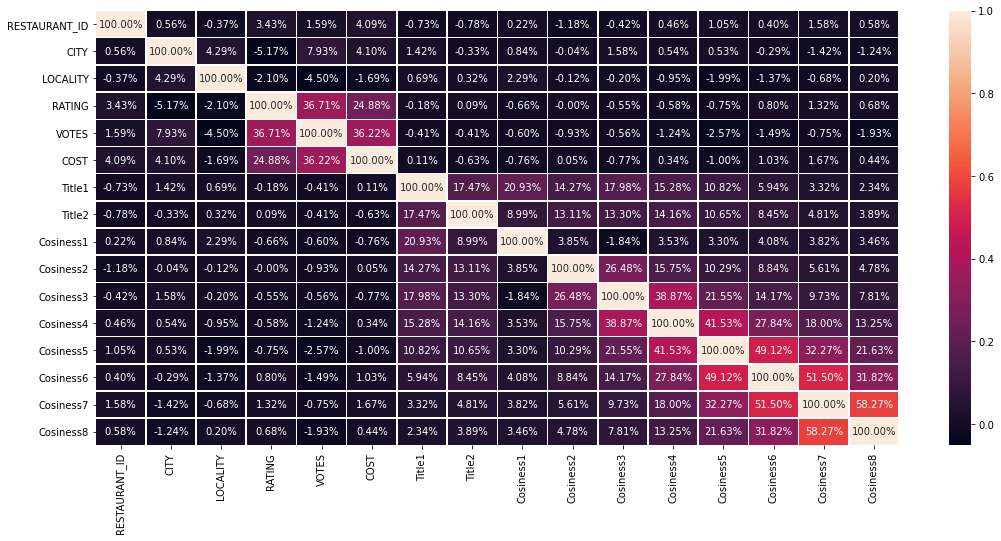

In [126]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(),linewidths=.5,fmt='0.2%',annot=True)

##### Heatmap shows that RATING and VOTING are more correalating with cost

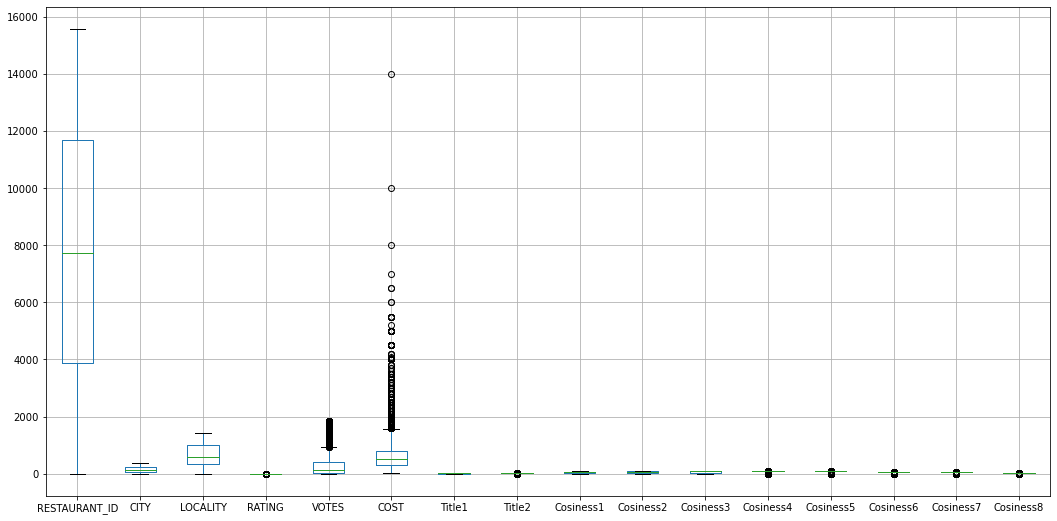

In [134]:
df.boxplot(figsize=(18,9))

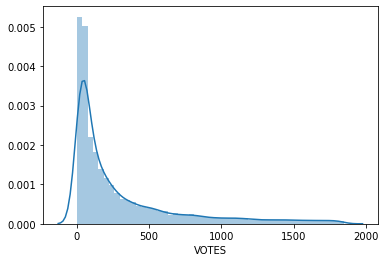

In [135]:
sns.distplot(df['VOTES'])

In [136]:
df['VOTES'].skew()

1.8807664988495814

In [140]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
df['VOTES']=pt.fit_transform(pd.DataFrame(df['VOTES']))

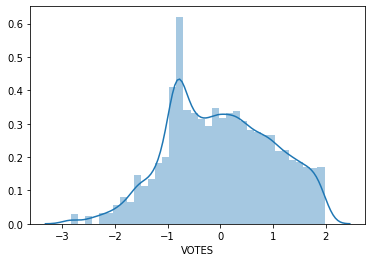

In [141]:
sns.distplot(df['VOTES'])

In [142]:
df['VOTES'].skew()

-0.02080727719916589

In [143]:
target=df['COST']
x=df.drop('COST',axis=1)
x

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,Title1,Title2,Cosiness1,Cosiness2,Cosiness3,Cosiness4,Cosiness5,Cosiness6,Cosiness7,Cosiness8
0,9438.0,321,285,3.6,-0.735967,4,15,59,32,66,85,78,69,47,19
1,13198.0,67,1047,4.2,-1.067769,4,1,6,60,41,85,78,69,47,19
2,10915.0,67,1102,3.8,0.314798,4,15,72,23,12,32,78,69,47,19
3,6346.0,222,136,4.1,-1.219603,21,15,100,23,93,85,78,69,47,19
4,15387.0,222,620,3.8,0.104426,8,15,28,98,93,85,78,69,47,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12683,5430.0,252,1004,4.1,1.655370,21,15,72,17,44,85,78,69,47,19
12684,8324.0,252,723,3.8,0.912232,4,1,37,25,93,85,78,69,47,19
12685,13228.0,131,342,3.8,0.992457,14,15,34,25,4,18,78,69,47,19
12686,9686.0,222,133,4.3,1.567935,4,15,72,84,21,76,78,69,47,19


In [144]:
# for best random state
best_state=0
accu=0
for i in range(30,250):
    X_train, X_test, y_train, y_test = train_test_split(x,target, test_size=0.25,random_state=i)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    pred = lr.predict(X_test)
    rscrore=r2_score(y_test,pred)
    crv=cross_val_score(LinearRegression(),X_train,y_train,cv=10).mean()
    if rscrore>accu:
        accu=rscrore
        best_state=i
print(f"Final accuracy is {accu*100} \n Cross Validate score is {(crv*100)} \n# difference is {(accu*100)-(crv*100)} \n best random state is{best_state}")

Final accuracy is 17.652396565317886 
 Cross Validate score is 14.208617389703113 
# difference is 3.4437791756147735 
 best random state is246


### Standard Scaller

In [128]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [129]:
x=ss.fit_transform(x)

In [130]:
x=pd.DataFrame(x)

#### Model Generation

In [129]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error,accuracy_score,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [132]:
# for best random state
best_state=0
accu=0
for i in range(30,250):
    X_train, X_test, y_train, y_test = train_test_split(x,target, test_size=0.25,random_state=i)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    pred = lr.predict(X_test)
    rscrore=r2_score(y_test,pred)
    crv=cross_val_score(LinearRegression(),X_train,y_train,cv=10).mean()
    if rscrore>accu:
        accu=rscrore
        best_state=i
print(f"Final accuracy is {accu*100} \n Cross Validate score is {(crv*100)} \n# difference is {(accu*100)-(crv*100)} \n best random state is{best_state}")

Final accuracy is 18.856986719857048 
 Cross Validate score is 15.230627841410676 
# difference is 3.6263588784463714 
 best random state is246


### Pipeline

In [133]:
X_train, X_test, y_train, y_test = train_test_split(x,target, test_size=0.25,random_state=246)

In [134]:
from sklearn.pipeline import Pipeline

In [135]:
parameters_sgd={
 'penalty': ['l1','l2','elasticnet'],
 'alpha': [0.0001,0.001,0.01,0.1,1],
    'max_iter':[1000,2000],
}
parameters_rndf={
 'criterion': ['mse','mae'],
 'max_features': ['auto','sqrt'],
 'n_estimators': list(np.arange(100,150)),
 'random_state': [246],
    'max_depth':[5],
}
parameters_deci_tree={
 'criterion': ['mse','mae'],
#  'splitter':['best','random'],
 'max_features': ['auto','sqrt'],
 'max_depth':[5],
 'random_state': [246]}
parameters_knn_reg={
    'n_neighbors': list(np.arange(5,10)),
    'weights':['uniform','distance'],
    
}
parameters_svr_reg={
    'kernel': ['linear','poly','rbf'],
#     'gamma':['auto','scale'],
#     'max_iter':[500,700,900,1100,1300,1500,1700],
    'max_iter':[500,700],
    
}
parameters_linear_reg = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

In [136]:
parameter_lis=[parameters_linear_reg,parameters_knn_reg,parameters_svr_reg,parameters_deci_tree,parameters_sgd]
models=[LinearRegression(),KNeighborsRegressor(),SVR(),DecisionTreeRegressor(),SGDRegressor()]
models_name=['LinearRegression','KNeighborsRegressor','SVR','DecisionTreeRegressor','SGDRegressor']
lis_pipes=[]    
best_score=0
best_model_name=''
cv_score=0
for n,model,model_name,parameter in zip(np.arange(1,6),models,models_name,parameter_lis):
    lis_pipes.append(Pipeline([(model_name,GridSearchCV(estimator=model,param_grid=parameter,cv=5,scoring='r2'))]))

for model in lis_pipes:
    gsv=model.fit(X_train,y_train)
    pred=gsv[0].best_estimator_.predict(X_test)
    r2score=r2_score(y_test,pred)
    crv=cross_val_score(model,X_train,y_train,cv=2).mean()
    print(f"Final accuracy is {r2score*100} \n\nCross Validate score is {(crv*100)}\n\n{gsv[0].best_estimator_}\n\n{gsv[0].best_params_}\n\n=====================================================")
    if r2score>best_score and crv>0:
        best_score=r2score
        best_model_name=[]
        best_model_name.append(gsv[0])
        
print(f"Best model name is :  {best_model_name[0]}")

Final accuracy is 18.856986719857048 

Cross Validate score is 13.301737130076196

LinearRegression()

{'copy_X': True, 'fit_intercept': True, 'normalize': False}

Final accuracy is 10.070920521567716 

Cross Validate score is 5.046396444402768

KNeighborsRegressor(n_neighbors=9)

{'n_neighbors': 9, 'weights': 'uniform'}

Final accuracy is 12.677114963495661 

Cross Validate score is 0.5124894560979198

SVR(kernel='linear', max_iter=500)

{'kernel': 'linear', 'max_iter': 500}

Final accuracy is 22.031352989121878 

Cross Validate score is 11.225654147115366

DecisionTreeRegressor(max_depth=5, max_features='auto', random_state=246)

{'criterion': 'mse', 'max_depth': 5, 'max_features': 'auto', 'random_state': 246}

Final accuracy is 18.575420783254202 

Cross Validate score is 13.369194050607014

SGDRegressor(alpha=0.01, max_iter=2000, penalty='l1')

{'alpha': 0.01, 'max_iter': 2000, 'penalty': 'l1'}

Best model name is :  GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
           

In [137]:
######  criterion{“mse”, “mae”}, default=”mse”
def rndtree(a,b):
    accu=0
    best_n=0
    for i in a:
        mod=RandomForestRegressor(n_estimators=i,random_state=b)
        mod.fit(X_train,y_train)
        pred = mod.predict(X_test)
        accuracy=r2_score(y_test,pred)
        if accuracy>accu:
            accu=accuracy
            best_n=i
    mod=RandomForestRegressor(n_estimators=best_n,random_state=b)
    mod.fit(X_train,y_train)
    predictions = mod.predict(X_test)
    print(r2_score(y_test,predictions)*100)
    print((cross_val_score(RandomForestRegressor(),X_train,y_train,cv=5).mean()*100))
    print("best n is ", best_n)

In [138]:
rndtree(list(np.arange(120,170)),246)

20.244467262856624
14.214191016925698
best n is  169


In [139]:
def rftree(a,b,c):
    mod=RandomForestRegressor(n_estimators=i,random_state=b,criterion=c)
    mod.fit(X_train,y_train)
    pred = mod.predict(X_test)
    print(r2_score(y_test,pred)*100)
    print((cross_val_score(RandomForestRegressor(n_estimators=i,random_state=b,criterion=c),X_train,y_train,cv=5).mean()*100))

In [140]:
rftree(169,246,'mae')

20.492231151890984
14.85474257649769


In [141]:
rftree(169,246,'mse')

20.26701089096864
14.370532757768265


In [142]:
rfc=RandomForestRegressor(n_estimators=155,random_state=133,criterion='mae')
rfc.fit(X_train,y_train)

RandomForestRegressor(n_estimators=155, random_state=133)

# Conclusion: Best Model DescisionRegressor from all above models

In [143]:
import pickle
file_name='restaurant_cost.pkl'
pickle.dump(rfc,open(file_name,'wb'))